In [135]:
import pandas as pd
import numpy as np
import pickle
from StringContains import ContainedStringCase 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
from jmh_parser import parseFile
import os.path

In [167]:
def read_log(file_path, regex_len, str_len, match_type, match_pos = None):
    df = parseFile(file_path)
    df = df[["Iteration","Iteration Type","Measurement Unit","Method","Score"]]
    print(regex_len, str_len, match_pos, match_type)
    df["str_len"] = str_len
    df["regex_len"] = regex_len
    df["match_pos"] = match_pos if match_pos is not None else str_len + 1
    df['pos_ratio'] = 1 if not match_pos else 0.5 if match_pos > 0 else 0
    df["match_type"] = match_type
    return df

input_dir = "string_contains_matches/"
results_dir = "string_contains_matches/"
data = []
for r_l in [5, 50, 500, 5000]:
    for s_l in [10, 100, 1000, 10000, 100000, 130000]:
        if s_l <= r_l: continue
            
        file_name = "_".join([str(r_l), str(s_l), "match", "pos", '0.log'])
        print(file_name)
        
        if not os.path.isfile(input_dir + file_name):
            break
        
        df = read_log(input_dir + file_name, r_l, s_l, "M", 0)
        data.append(df)
        
        
        file_name = "_".join([str(r_l), str(s_l), "match", "pos", 'half.log'])
        print(file_name)
        df = read_log(input_dir + file_name, r_l, s_l, "M", s_l//2)
        data.append(df)

input_dir = "string_contains_nonmatches/"
results_dir = "string_contains_nonmatches/"
data2 = []
for r_l in [5, 50, 500, 5000]:
    for s_l in [10, 100, 1000, 10000, 100000, 130000]:
        if s_l <= r_l: continue
        
        for index in range(5):
            file_name = "_".join([str(r_l), str(s_l), "nonmatch", str(index)+'.log'])
            print(file_name)

            if not os.path.isfile(input_dir + file_name):
                break
        
            df = read_log(input_dir + file_name, r_l, s_l, "NM")
            data2.append(df)
            
data.extend(data2)            
data = pd.concat(data, axis=0, ignore_index=True)
print(data.shape)
data.head()
# data["Score_log10"] = np.log10(data.loc[:,'Score'])
# data.head()

5_10_match_pos_0.log
Parsing file string_contains_matches/5_10_match_pos_0.log
Saving the parsed jmh results in file = string_contains_matches/5_10_match_pos_0_parsed.csv
5 10 0 M
5_10_match_pos_half.log
Parsing file string_contains_matches/5_10_match_pos_half.log
Saving the parsed jmh results in file = string_contains_matches/5_10_match_pos_half_parsed.csv
5 10 5 M
5_100_match_pos_0.log
Parsing file string_contains_matches/5_100_match_pos_0.log
Saving the parsed jmh results in file = string_contains_matches/5_100_match_pos_0_parsed.csv
5 100 0 M
5_100_match_pos_half.log
Parsing file string_contains_matches/5_100_match_pos_half.log
Saving the parsed jmh results in file = string_contains_matches/5_100_match_pos_half_parsed.csv
5 100 50 M
5_1000_match_pos_0.log
Parsing file string_contains_matches/5_1000_match_pos_0.log
Saving the parsed jmh results in file = string_contains_matches/5_1000_match_pos_0_parsed.csv
5 1000 0 M
5_1000_match_pos_half.log
Parsing file string_contains_matches/5_

Saving the parsed jmh results in file = string_contains_nonmatches/5_100_nonmatch_0_parsed.csv
5 100 None NM
5_100_nonmatch_1.log
Parsing file string_contains_nonmatches/5_100_nonmatch_1.log
Saving the parsed jmh results in file = string_contains_nonmatches/5_100_nonmatch_1_parsed.csv
5 100 None NM
5_100_nonmatch_2.log
Parsing file string_contains_nonmatches/5_100_nonmatch_2.log
Saving the parsed jmh results in file = string_contains_nonmatches/5_100_nonmatch_2_parsed.csv
5 100 None NM
5_100_nonmatch_3.log
Parsing file string_contains_nonmatches/5_100_nonmatch_3.log
Saving the parsed jmh results in file = string_contains_nonmatches/5_100_nonmatch_3_parsed.csv
5 100 None NM
5_100_nonmatch_4.log
Parsing file string_contains_nonmatches/5_100_nonmatch_4.log
Saving the parsed jmh results in file = string_contains_nonmatches/5_100_nonmatch_4_parsed.csv
5 100 None NM
5_1000_nonmatch_0.log
Parsing file string_contains_nonmatches/5_1000_nonmatch_0.log
Saving the parsed jmh results in file = str

Saving the parsed jmh results in file = string_contains_nonmatches/50_100000_nonmatch_3_parsed.csv
50 100000 None NM
50_100000_nonmatch_4.log
Parsing file string_contains_nonmatches/50_100000_nonmatch_4.log
Saving the parsed jmh results in file = string_contains_nonmatches/50_100000_nonmatch_4_parsed.csv
50 100000 None NM
50_130000_nonmatch_0.log
Parsing file string_contains_nonmatches/50_130000_nonmatch_0.log
Saving the parsed jmh results in file = string_contains_nonmatches/50_130000_nonmatch_0_parsed.csv
50 130000 None NM
50_130000_nonmatch_1.log
Parsing file string_contains_nonmatches/50_130000_nonmatch_1.log
Saving the parsed jmh results in file = string_contains_nonmatches/50_130000_nonmatch_1_parsed.csv
50 130000 None NM
50_130000_nonmatch_2.log
Parsing file string_contains_nonmatches/50_130000_nonmatch_2.log
Saving the parsed jmh results in file = string_contains_nonmatches/50_130000_nonmatch_2_parsed.csv
50 130000 None NM
50_130000_nonmatch_3.log
Parsing file string_contains_n

Saving the parsed jmh results in file = string_contains_nonmatches/5000_130000_nonmatch_4_parsed.csv
5000 130000 None NM
(3276, 10)


,Iteration,Iteration Type,Measurement Unit,Method,Score,str_len,regex_len,match_pos,pos_ratio,match_type
0,1,warmup,ns/op,regexMatches,232.251,10,5,0,1.0,M
1,2,warmup,ns/op,regexMatches,174.305,10,5,0,1.0,M
2,3,warmup,ns/op,regexMatches,155.122,10,5,0,1.0,M
3,1,measured,ns/op,regexMatches,145.190,10,5,0,1.0,M
4,2,measured,ns/op,regexMatches,145.264,10,5,0,1.0,M


In [168]:
filter_regex = data["Method"] == "regexMatches"
filter_measure = data["Iteration Type"] == "measured"
data = data.astype({"Iteration":"int32","Score":"float"})
data.dtypes
data["Score_log10"] = np.log10(data.loc[:,"Score"])
data.head()
data = data.loc[filter_measure,:]
data['regex_len'].value_counts()

5       840
50      700
500     560
5000    420
Name: regex_len, dtype: int64

In [172]:
X = data[['Method', 'str_len', 'regex_len', 'match_type', 'pos_ratio']]
Y = data[["Score"]]
X = pd.get_dummies(data=X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
model = LinearRegression()
model.fit(X_train,y_train)
# print the intercept
print(model.intercept_)
print(model.coef_)
print(model.coef_.size)
print(type(model.coef_))
print(X.columns)
coeff_parameter = pd.DataFrame(data = model.coef_[0], index = X.columns, columns = ['Coefficient'])
print(coeff_parameter)
predictions = model.predict(X_test)
predictions2 = pd.DataFrame(predictions//1000) # microsecondes
predictions2.describe()

(1512, 5)
(1008, 5)
(1512, 1)
(1008, 1)
[-35096.41268038]
[[ 2.91660215e+00 -9.96083920e-01  2.73992431e+05 -2.94783864e+05
  -9.66236273e+04]]
5
<class 'numpy.ndarray'>
Index(['str_len', 'regex_len', 'pos_ratio', 'Method_stringContains',
       'match_type_NM'],
      dtype='object')
                         Coefficient
str_len                     2.916602
regex_len                  -0.996084
pos_ratio              273992.430538
Method_stringContains -294783.863563
match_type_NM          -96623.627273


,0
count,1008.000000
mean,162.670635
std,220.887464
min,-193.000000
25%,-53.000000
50%,145.000000
75%,268.000000
max,618.000000


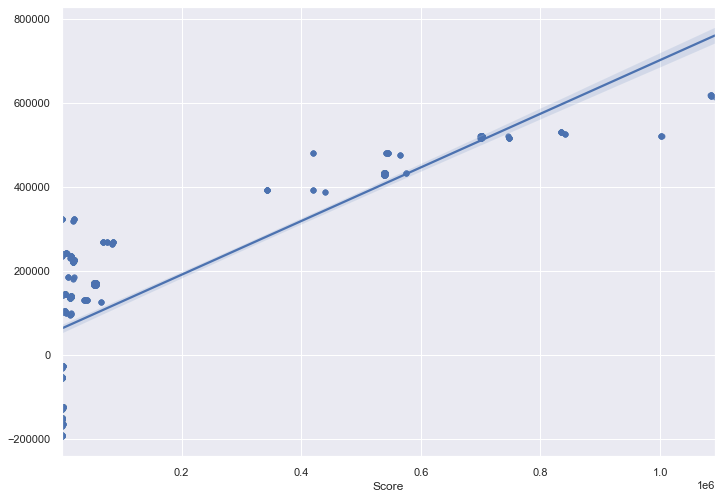

In [173]:
sns.regplot(y_test,predictions)

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data[['Method', 'str_len', 'regex_len', 'match_type', 'match_pos']]
Y = data[["Score"]]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,str_len,regex_len,match_pos,Method_stringContains,match_type_NM
3,10,5,0,0,0
4,10,5,0,0,0
5,10,5,0,0,0
6,10,5,0,0,0
7,10,5,0,0,0


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1512, 5)
(1008, 5)
(1512, 1)
(1008, 1)


In [176]:
model = LinearRegression()
model.fit(X_train,y_train)
# print the intercept
print(model.intercept_)
print(model.coef_)
print(model.coef_.size)
print(type(model.coef_))
print(X.columns)
coeff_parameter = pd.DataFrame(data = model.coef_[0], index = X.columns, columns = ['Coefficient'])
print(coeff_parameter)

[116861.83183394]
[[ 4.23952097e+00 -1.20722084e+00 -1.66069396e+00 -2.96883953e+05
   4.44600062e+04]]
5
<class 'numpy.ndarray'>
Index(['str_len', 'regex_len', 'match_pos', 'Method_stringContains',
       'match_type_NM'],
      dtype='object')
                         Coefficient
str_len                     4.239521
regex_len                  -1.207221
match_pos                  -1.660694
Method_stringContains -296883.953261
match_type_NM           44460.006175


In [177]:
predictions = model.predict(X_test)
predictions2 = pd.DataFrame(predictions//1000) # microsecondes
predictions2.describe()

,0
count,1008.000000
mean,157.775794
std,223.862153
min,-180.000000
25%,-110.000000
50%,161.000000
75%,263.000000
max,667.000000


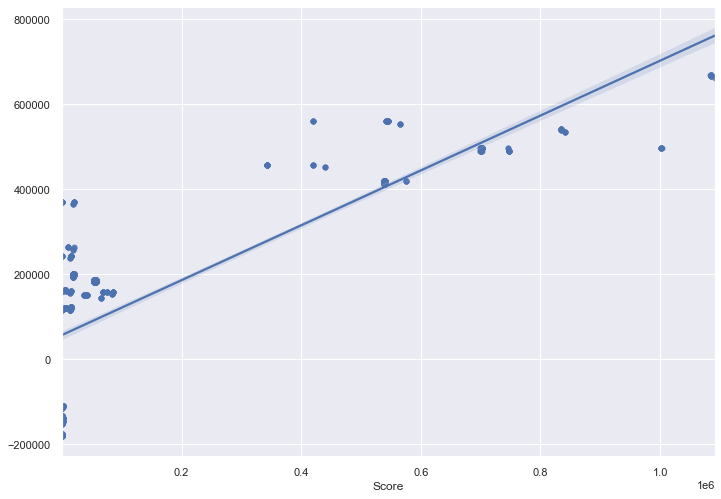

In [166]:
sns.regplot(y_test,predictions)

In [206]:
match_0_filter = data["match_pos"] == 0
data_0 = data.loc[match_0_filter, ]
data_1 = data.loc[~match_0_filter, ]
data['pos'] = data["match_pos"] == 0
filter_matches = data["match_type"] == "M"
data["str_len_log10"] = np.log10(data.loc[:,"str_len"])

In [179]:
df_regex = data.loc[filter_regex,:]
print(df_regex["Score"].describe())
print(df_regex.loc[:, "Score_log10"].describe())

count    1.260000e+03
mean     3.036210e+05
std      3.335657e+05
min      9.190100e+01
25%      5.438077e+03
50%      5.761529e+04
75%      5.424594e+05
max      1.093506e+06
Name: Score, dtype: float64
count    1260.000000
mean        4.675755
std         1.233893
min         1.963320
25%         3.735445
50%         4.760538
75%         5.734367
max         6.038821
Name: Score_log10, dtype: float64


In [180]:
df_string = data.loc[~filter_regex, :]
print(df_string["Score"].describe())
print(df_string.loc[:, "Score_log10"].describe())

count     1260.000000
mean      7427.688390
std       8234.299549
min          8.963000
25%         62.541750
50%       1474.489500
75%      15056.723000
max      19745.837000
Name: Score, dtype: float64
count    1260.000000
mean        2.994649
std         1.238306
min         0.952453
25%         1.796170
50%         3.168642
75%         4.177730
max         4.295476
Name: Score_log10, dtype: float64


<ipython-input-216-95e352b7b4ce>:4: MatplotlibDeprecationWarning: Unrecognized location 'top center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="top center")


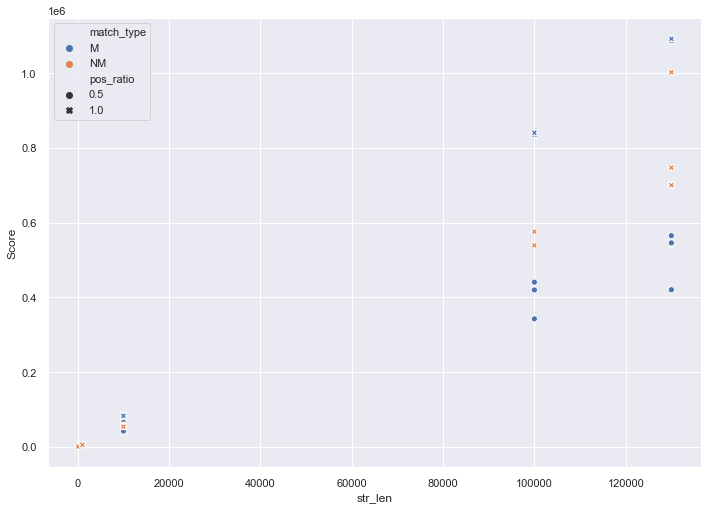

In [216]:
sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data.loc[filter_regex,:], x="str_len", y="Score", hue="match_type", style="pos_ratio") #err_style="bars")
plt.legend(loc="top center")

5       300
50      250
500     200
5000    150
Name: regex_len, dtype: int64


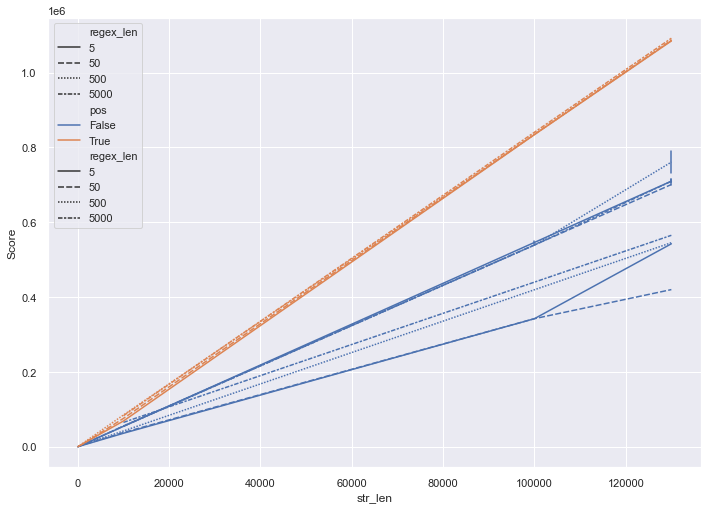

In [211]:
print(data.loc[filter_regex & ~filter_matches,"regex_len"].value_counts())
sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data.loc[filter_regex & ~filter_matches,:], x="str_len", y="Score", style="regex_len", err_style="bars")
#sns.scatterplot(data=data.loc[filter_regex,:], x="str_len", y="Score", hue="pos", style="regex_len") #err_style="bars")
sns.lineplot(data=data.loc[filter_regex & filter_matches,:], x="str_len", y="Score", hue="pos", style="regex_len", err_style="bars")

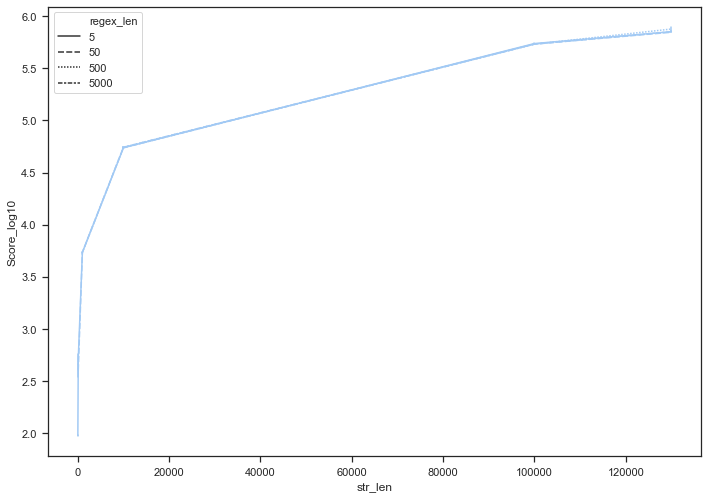

In [196]:
sns.set(style="ticks", palette="pastel")
sns.lineplot(data=data.loc[filter_regex & ~filter_matches,:], x="str_len", y="Score_log10", style="regex_len", err_style="bars")


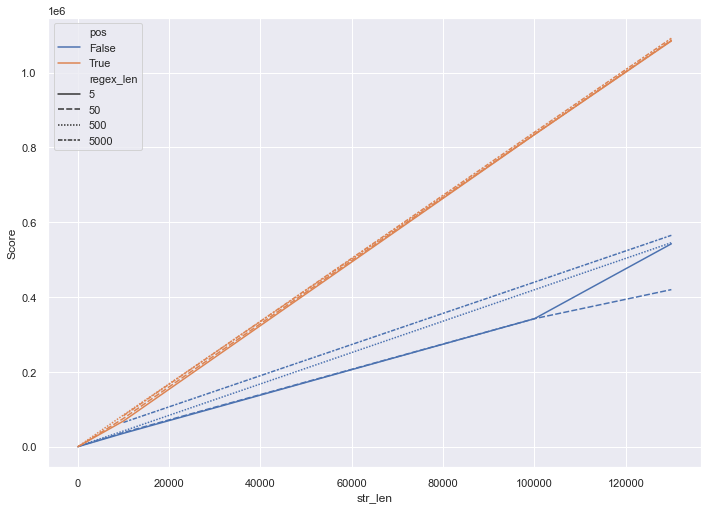

In [197]:
# check the linear with str_len, match_pos; fixed: Method, regex_len
#data.loc[filter_regex & match_0_filter,:]
sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data.loc[filter_regex & filter_matches,:], x="str_len", y="Score", hue="pos", style="regex_len", err_style="bars")
#sns.scatterplot(data=data.loc[filter_regex,:], x="str_len", y="Score", hue="pos", style="regex_len") #err_style="bars")

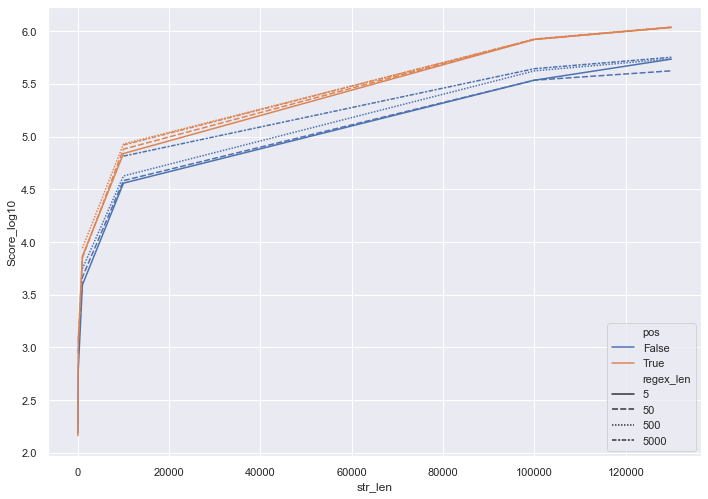

In [200]:
sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data.loc[filter_regex & filter_matches,:], x="str_len", y="Score_log10", hue="pos", style="regex_len", err_style="bars")

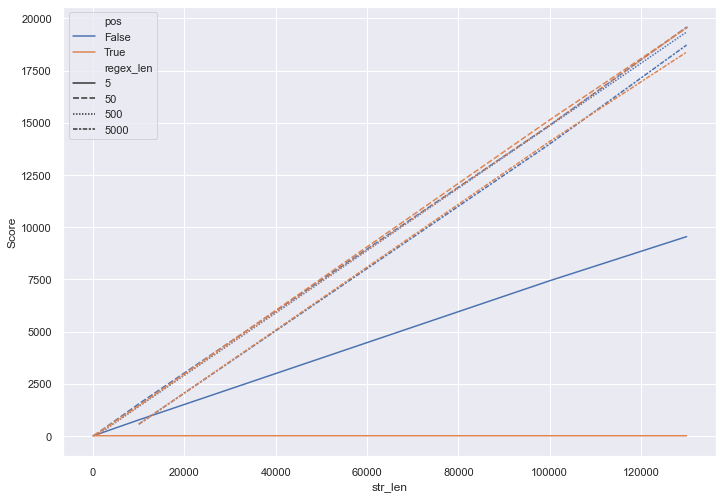

In [202]:
sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data.loc[~filter_regex & filter_matches,:], x="str_len", y="Score", hue="pos", style="regex_len", err_style="bars")

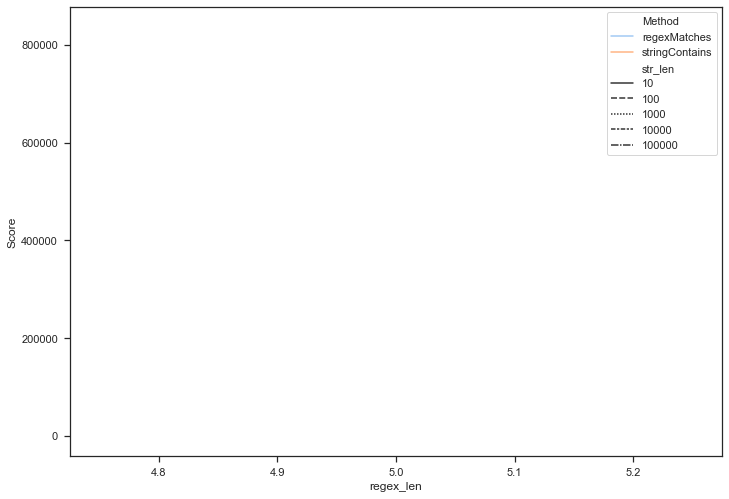

In [92]:
# check the linear with regex_len, method; fixed: match_pos, str_len
sns.lineplot(data=data.loc[match_0_filter,:], x="regex_len", y="Score", hue="Method", style="str_len", err_style="bars")

(0.0, 6.0)

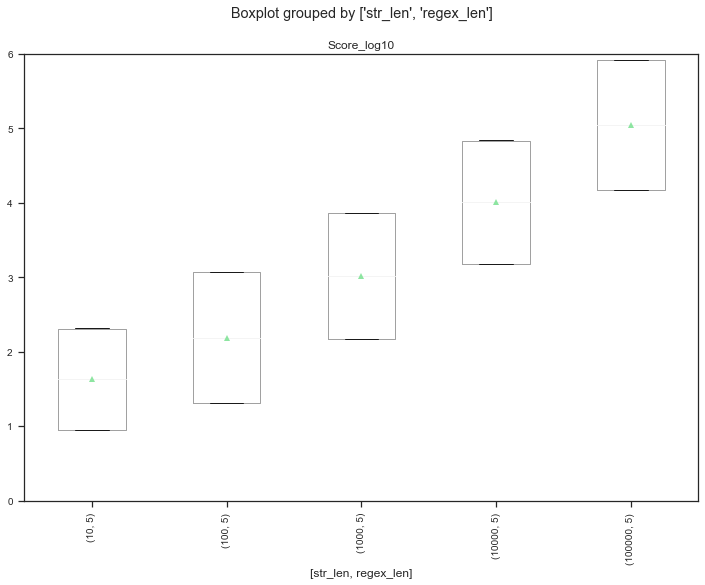

In [97]:
ax = data.loc[match_0_filter,:].boxplot(by = ["str_len","regex_len"], column = "Score_log10", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0, 6)

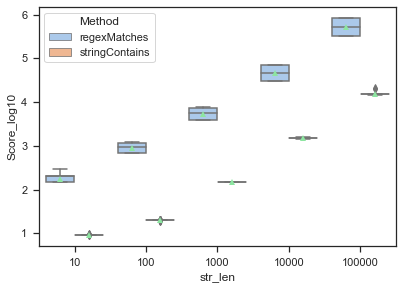

In [41]:
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="str_len", y="Score_log10",
            hue="Method", 
            data=data, showmeans=True)

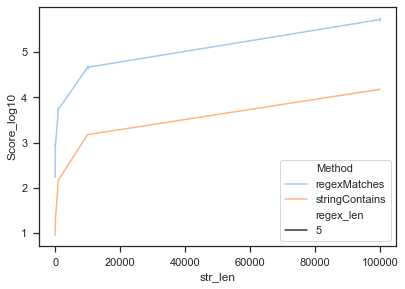

In [42]:
sns.lineplot(data=data, x="str_len", y="Score_log10", hue="Method", style="regex_len", err_style="bars")

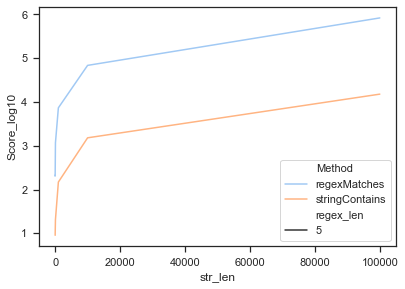

In [46]:
sns.lineplot(data=data_0, x="str_len", y="Score_log10", hue="Method", style="regex_len", err_style="bars")

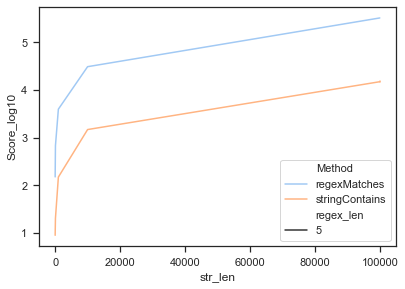

In [47]:
sns.lineplot(data=data_1, x="str_len", y="Score_log10", hue="Method", style="regex_len", err_style="bars")

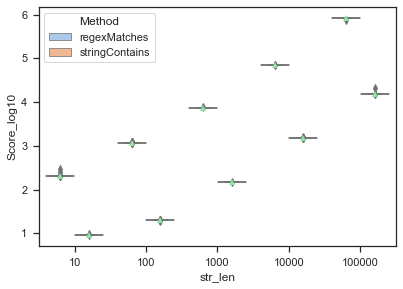

In [48]:
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="str_len", y="Score_log10",
            hue="Method", 
            data=data_0, showmeans=True)

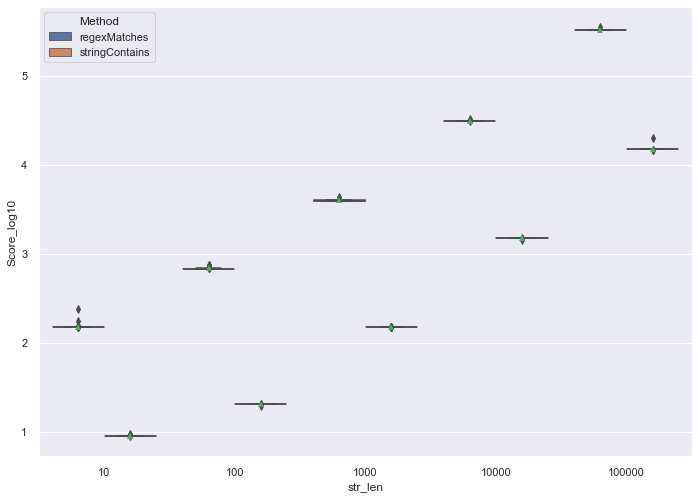

In [57]:
sns.set(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="str_len", y="Score_log10",
            hue="Method", 
            data=data_1, showmeans=True)

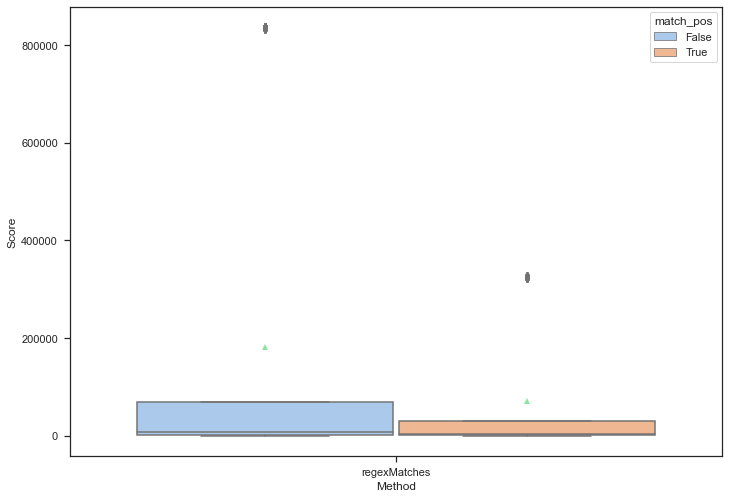

In [65]:
data["match_pos"] = data["match_pos"] != 0
sns.set(style="ticks", palette="pastel")
ax = sns.boxplot(x="Method", y="Score",
            hue="match_pos", 
            data=data.loc[filter_regex,:], showmeans=True)

(0.0, 6.0)

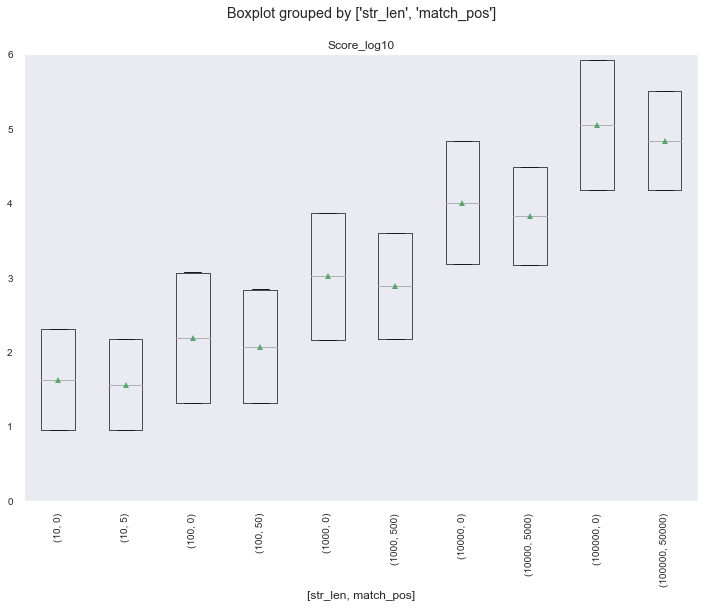

In [59]:
ax = data.boxplot(by = ["str_len","match_pos"], column = "Score_log10", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0, 6)

(0.0, 7.0)

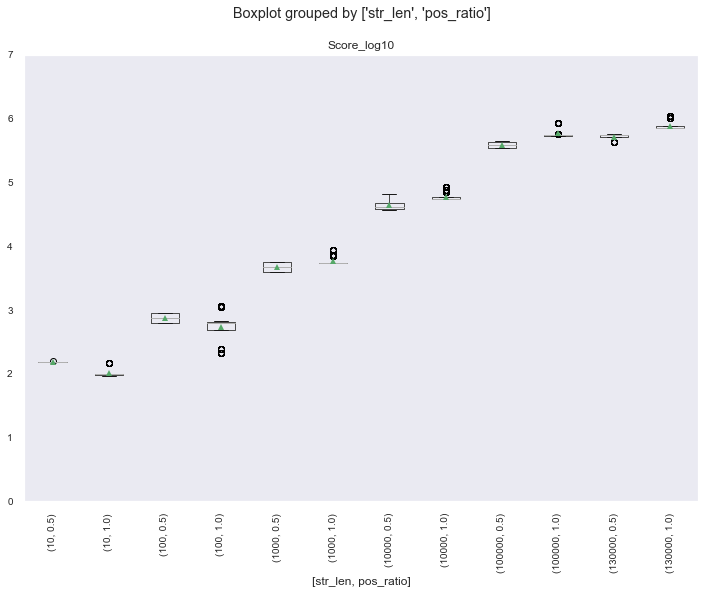

In [221]:
ax = df_regex.boxplot(by = ["str_len","pos_ratio"], column = "Score_log10", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0, 7)

(0.0, 7.0)

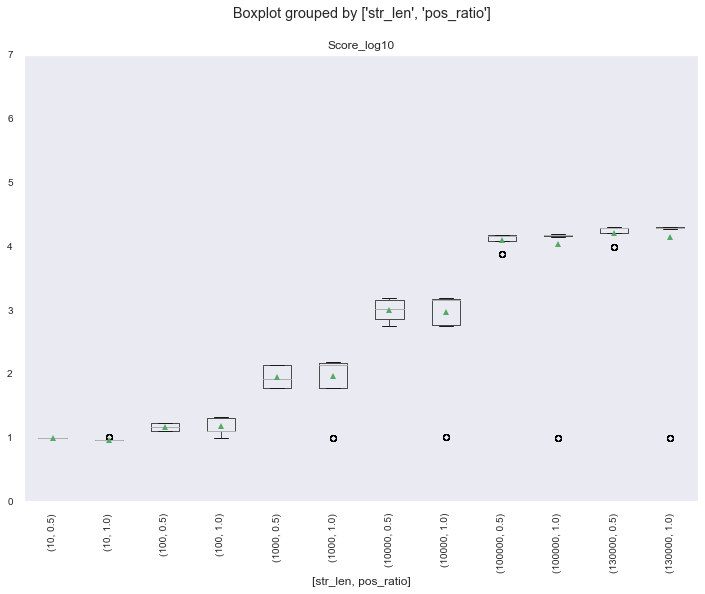

In [222]:
ax = df_string.boxplot(by = ["str_len","pos_ratio"], column = "Score_log10", grid = False, rot = 90, fontsize=10, showmeans = True)
ax.set_ylim(0, 7)